In [1]:
from framework import *
from rand import *

In [2]:
def create_n_model(n, delay = 1, max_queue = 10):
    create = Create(delay, 'create')
    processes = []

    for i in range(n):
        processes.append(Process(delay, 'process' + str(i), max_queue))
    
    create.next_elements = [processes[0]]
    for i in range(n - 1):
        processes[i].next_elements = [processes[i + 1]]
    
    all_elements = [create] + processes

    model = Model(all_elements)
    return model

Simulation for n=10 took 0.03541111946105957 seconds.
Simulation for n=20 took 0.052323102951049805 seconds.
Simulation for n=30 took 0.07055163383483887 seconds.
Simulation for n=40 took 0.0932760238647461 seconds.
Simulation for n=50 took 0.11781001091003418 seconds.
Simulation for n=60 took 0.13851356506347656 seconds.
Simulation for n=70 took 0.15833544731140137 seconds.
Simulation for n=80 took 0.19011235237121582 seconds.
Simulation for n=90 took 0.2135305404663086 seconds.
Simulation for n=100 took 0.23075103759765625 seconds.
Simulation for n=110 took 0.2521657943725586 seconds.
Simulation for n=120 took 0.2735114097595215 seconds.
Simulation for n=130 took 0.29535508155822754 seconds.
Simulation for n=140 took 0.34317755699157715 seconds.
Simulation for n=150 took 0.3956172466278076 seconds.
Simulation for n=160 took 0.40615391731262207 seconds.
Simulation for n=170 took 0.3819923400878906 seconds.
Simulation for n=180 took 0.39943957328796387 seconds.
Simulation for n=190 too

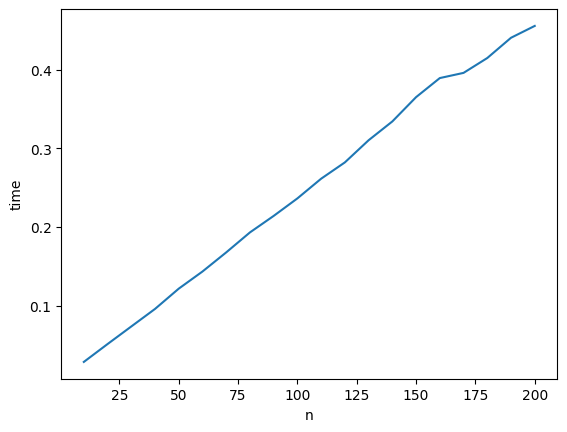

In [12]:
import time

N_AVG = 5
stats_avg = []

FROM_EXPERIMENT = 10
TO_EXPERIMENT = 201
STEP_EXPERIMENT = 10

for n_avg in range(N_AVG):
    stats = dict()
    for n in range(FROM_EXPERIMENT, TO_EXPERIMENT, STEP_EXPERIMENT):
        start_time = time.time()
        model = create_n_model(n)
        model.simulate(1000, logging=False)
        end_time = time.time()

        stats[n] = end_time - start_time

        print(f"Simulation for n={n} took {end_time - start_time} seconds.")
    
    stats_avg.append(stats)

import matplotlib.pyplot as plt

def stats_avg_to_stats_composed(stats_avg_local):
    stats_composed_local = dict()
    for n in range(FROM_EXPERIMENT, TO_EXPERIMENT, STEP_EXPERIMENT):
        stats_composed_local[n] = 0

    for stats in stats_avg_local:
        for n in range(FROM_EXPERIMENT, TO_EXPERIMENT, STEP_EXPERIMENT):
            stats_composed_local[n] += stats[n]

    for n in range(FROM_EXPERIMENT, TO_EXPERIMENT, STEP_EXPERIMENT):
        stats_composed_local[n] /= N_AVG
    
    return stats_composed_local

stats_composed = stats_avg_to_stats_composed(stats_avg)

plt.plot(stats_composed.keys(), stats_composed.values())
plt.xlabel('n')
plt.ylabel('time')
plt.show()


In [4]:
# same experiment but different model structure

def create_n_model_different_structure(n, delay = 1, max_queue = 10):
    create = Create(delay, 'create')
    
    processes1 = []
    for i in range(int(n/2)):
        processes1.append(Process(delay, 'process' + str(i), max_queue))
    
    processes2 = []
    for i in range(int(n/2)):
        processes2.append(Process(delay, 'process' + str(i), max_queue))

    create.next_elements = [processes1[0], processes2[0]]
    for i in range(int(n/2 - 1)):
        processes1[i].next_elements = [processes1[i + 1]]
        processes2[i].next_elements = [processes2[i + 1]]
    
    all_elements = [create] + processes1 + processes2

    model = Model(all_elements)
    return model

Simulation for n=10 took 0.02562093734741211 seconds.
Simulation for n=20 took 0.03708839416503906 seconds.
Simulation for n=30 took 0.05033087730407715 seconds.
Simulation for n=40 took 0.057831764221191406 seconds.
Simulation for n=50 took 0.07481932640075684 seconds.
Simulation for n=60 took 0.09750103950500488 seconds.
Simulation for n=70 took 0.10328221321105957 seconds.
Simulation for n=80 took 0.11156010627746582 seconds.
Simulation for n=90 took 0.1267237663269043 seconds.
Simulation for n=100 took 0.1401975154876709 seconds.
Simulation for n=110 took 0.15545129776000977 seconds.
Simulation for n=120 took 0.17075467109680176 seconds.
Simulation for n=130 took 0.22987031936645508 seconds.
Simulation for n=140 took 0.22028422355651855 seconds.
Simulation for n=150 took 0.21491241455078125 seconds.
Simulation for n=160 took 0.22597575187683105 seconds.
Simulation for n=170 took 0.2691824436187744 seconds.
Simulation for n=180 took 0.30473852157592773 seconds.
Simulation for n=190 

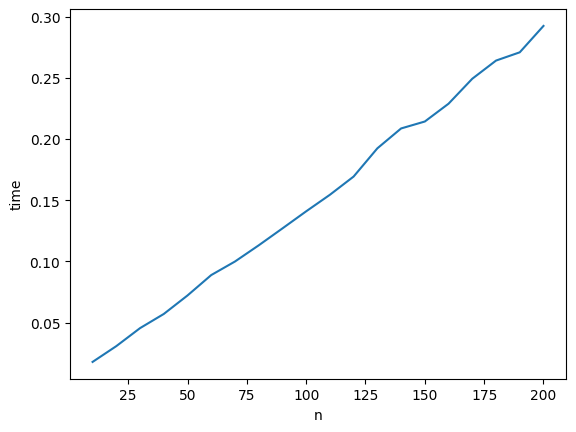

In [13]:
import time

stats_avg = []

for n_avg in range(N_AVG):
    stats = dict()
    for n in range(FROM_EXPERIMENT, TO_EXPERIMENT, STEP_EXPERIMENT):
        start_time = time.time()
        model = create_n_model_different_structure(n)
        model.simulate(1000, logging=False)
        end_time = time.time()
    
        stats[n] = end_time - start_time
    
        print(f"Simulation for n={n} took {end_time - start_time} seconds.")
    
    stats_avg.append(stats)

stats_composed = stats_avg_to_stats_composed(stats_avg)

import matplotlib.pyplot as plt

plt.plot(stats_composed.keys(), stats_composed.values())
plt.xlabel('n')
plt.ylabel('time')
plt.show()